# Assignment - 09
# PCA
# Question 1

wine data

In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 


In [2]:
wine=pd.read_csv('wine (1).csv')
wine

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 14 columns]

In [3]:
wine1=wine.iloc[:,1:]
wine1

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0      14.23   1.71  2.43        15.6        127     2.80        3.06   
1      13.20   1.78  2.14        11.2        100     2.65        2.76   
2      13.16   2.36  2.67        18.6        101     2.80        3.24   
3      14.37   1.95  2.50        16.8        113     3.85        3.49   
4      13.24   2.59  2.87        21.0        118     2.80        2.69   
..       ...    ...   ...         ...        ...      ...         ...   
173    13.71   5.65  2.45        20.5         95     1.68        0.61   
174    13.40   3.91  2.48        23.0        102     1.80        0.75   
175    13.27   4.28  2.26        20.0        120     1.59        0.69   
176    13.17   2.59  2.37        20.0        120     1.65        0.68   
177    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 13 columns]

In [4]:
wine1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
wine1.describe()

Alcohol       Malic         Ash  Alcalinity   Magnesium     Phenols  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean    13.000618    2.336348    2.366517   19.494944   99.741573    2.295112   
std      0.811827    1.117146    0.274344    3.339564   14.282484    0.625851   
min     11.030000    0.740000    1.360000   10.600000   70.000000    0.980000   
25%     12.362500    1.602500    2.210000   17.200000   88.000000    1.742500   
50%     13.050000    1.865000    2.360000   19.500000   98.000000    2.355000   
75%     13.677500    3.082500    2.557500   21.500000  107.000000    2.800000   
max     14.830000    5.800000    3.230000   30.000000  162.000000    3.880000   

       Flavanoids  Nonflavanoids  Proanthocyanins       Color         Hue  \
count  178.000000     178.000000       178.000000  178.000000  178.000000   
mean     2.029270       0.361854         1.590899    5.058090    0.957449   
std      0.998859       0.124453         0.572359    2.318286    0.228572   
min      0.340000       0.130000         0.410000    1.280000    0.480000   
25%      1.205000       0.270000         1.250000    3.220000    0.782500   
50%      2.135000       0.340000         1.555000    4.690000    0.965000   
75%      2.875000       0.437500         1.950000    6.200000    1.120000   
max      5.080000       0.660000         3.580000   13.000000    1.710000   

         Dilution      Proline  
count  178.000000   178.000000  
mean     2.611685   746.893258  
std      0.709990   314.907474  
min      1.270000   278.000000  
25%      1.937500   500.500000  
50%      2.780000   673.500000  
75%      3.170000   985.000000  
max      4.000000  1680.000000

# Applying EDA to explore data with one function

In [19]:
import pandas_profiling as pp 

In [20]:
EDA_report= pp.ProfileReport(wine)
EDA_report.to_file(output_file='report.html') 
EDA_report   

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
wine2 = wine1.values
wine2

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

converted into array

Standardising data

In [7]:
wine_normal = scale(wine2)
wine_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [8]:
pca = PCA(n_components = 13)
pca_values = pca.fit_transform(wine_normal)
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [9]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

In [10]:
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

the above data refers to the variance percentage

In [11]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

the above data refers to the cumulative variance percentage

our 3 principle components gives 66.53% of information

In [12]:
pca_values[:,0:2]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

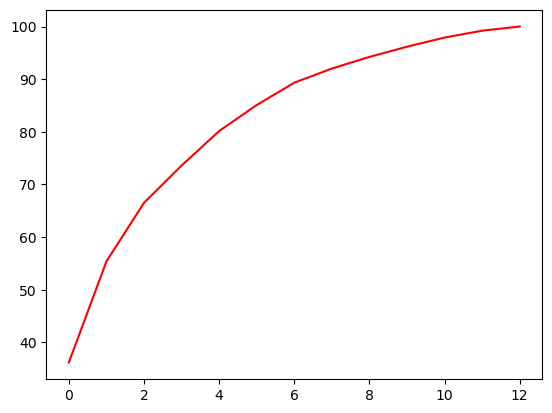

In [13]:
plt.plot(var1,color='red')

In [14]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3']), wine[['Type']]], axis = 1)
finalDf

pc1       pc2       pc3  Type
0    3.316751 -1.443463 -0.165739     1
1    2.209465  0.333393 -2.026457     1
2    2.516740 -1.031151  0.982819     1
3    3.757066 -2.756372 -0.176192     1
4    1.008908 -0.869831  2.026688     1
..        ...       ...       ...   ...
173 -3.370524 -2.216289 -0.342570     3
174 -2.601956 -1.757229  0.207581     3
175 -2.677839 -2.760899 -0.940942     3
176 -2.387017 -2.297347 -0.550696     3
177 -3.208758 -2.768920  1.013914     3

[178 rows x 4 columns]

In [15]:
import seaborn as sns

<AxesSubplot:>

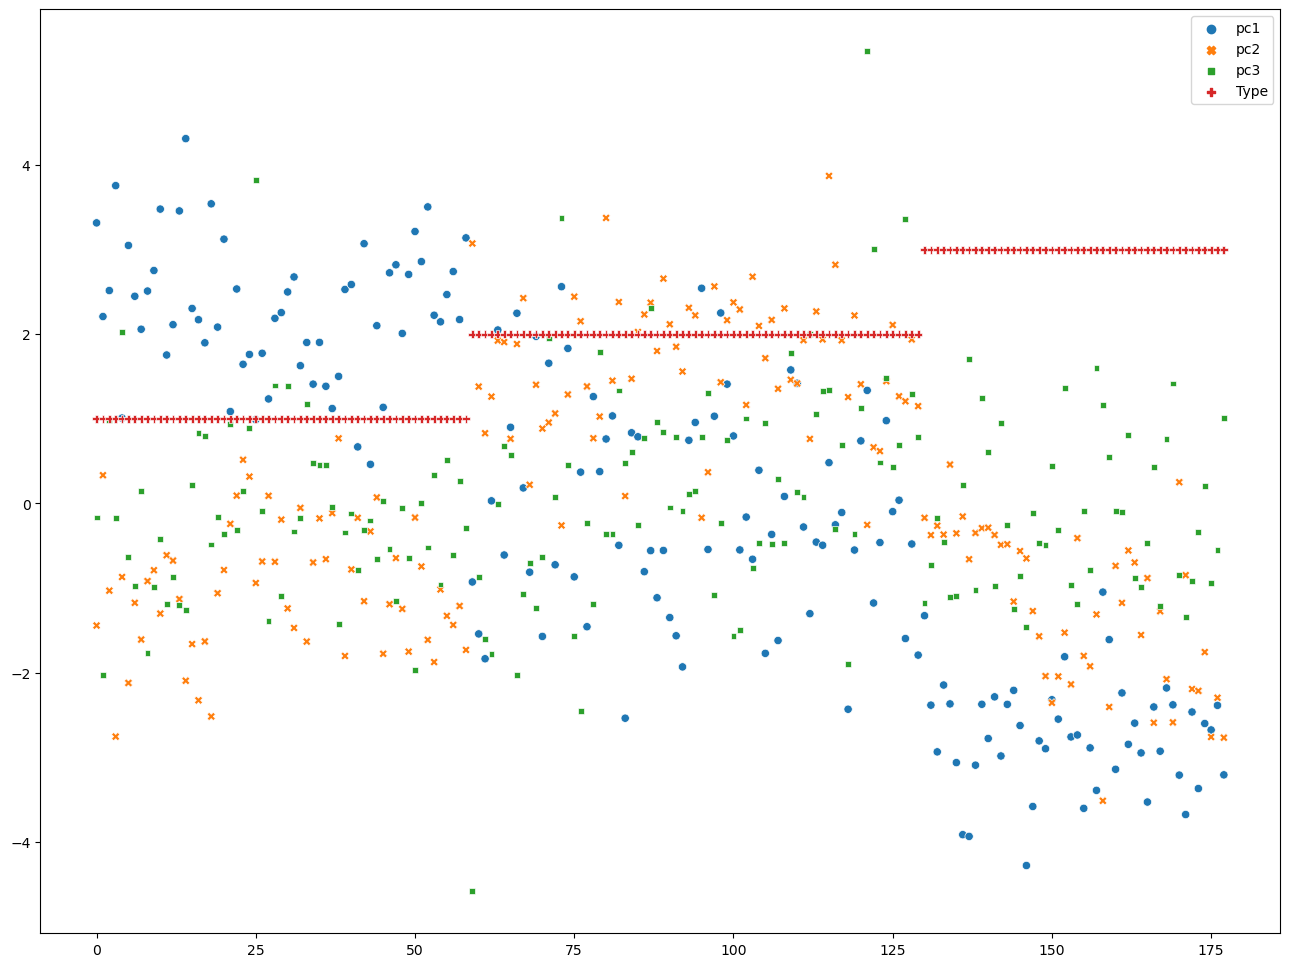

In [16]:
fig=plt.figure(figsize=(16,12))
sns.scatterplot(data=finalDf)

# Performing clustering using 3 principle components

# Hierarchial clustering

In [17]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

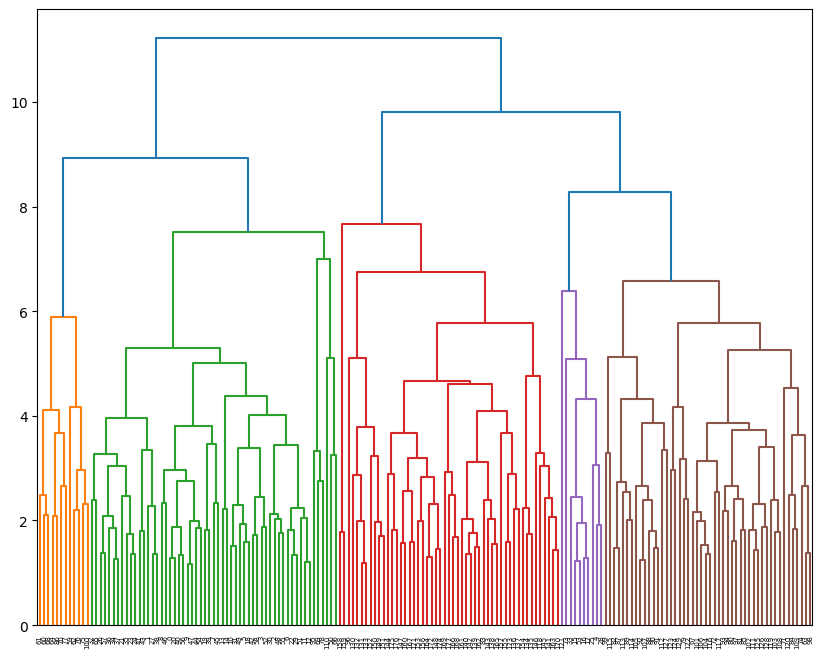

In [18]:
plt.figure(figsize=(10,8))
dendrogram=sch.dendrogram(sch.linkage(wine_normal,'complete'))

5 clusters created

In [64]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=5, linkage='average',affinity = "euclidean").fit(wine_normal) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
wine['clust']=cluster_labels 
wine

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  clust  
0             0.28             2.29   5.64  1.04      3.92     1065      0  
1             0.26             1.28   4.38  1.05      3.40     1050      0  
2             0.30             2.81   5.68  1.03      3.17     1185      0  
3             0.24             2.18   7.80  0.86      3.45     1480      0  
4             0.39             1.82   4.32  1.04      2.93      735      0  
..             ...              ...    ...   ...       ...      ...    ...  
173           0.52             1.06   7.70  0.64      1.74      740      1  
174           0.43             1.41   7.30  0.70      1.56      750      1  
175           0.43             1.35  10.20  0.59      1.56      835      1  
176           0.53             1.46   9.30  0.60      1.62      840      1  
177           0.56             1.35   9.20  0.61      1.60      560      1  

[178 rows x 15 columns]

# K means Clustering

In [24]:
from sklearn.cluster import KMeans

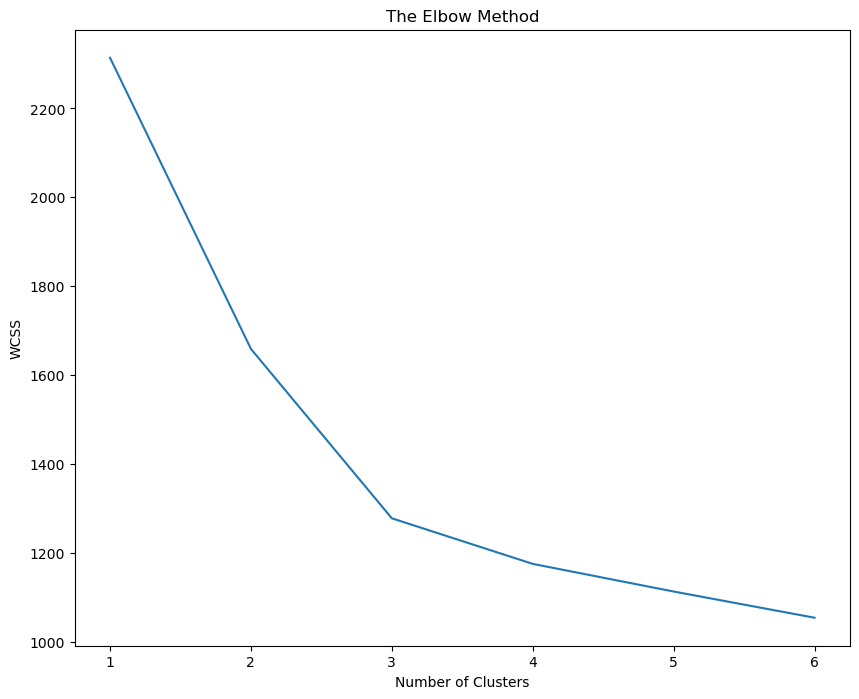

In [25]:
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 7):
    clf = KMeans(n_clusters=i)
    clf.fit(wine_normal)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 7), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show() 

# considering K as 5

In [60]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(wine_normal)  

In [61]:
y_kmeans
clf.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 4, 3, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 0, 1, 4, 0, 0,
       1, 1, 0, 1, 0, 4, 0, 3, 4, 1, 1, 0, 1, 4, 1, 1, 0, 2, 4, 1, 0, 0,
       0, 0, 0, 0, 0, 4, 4, 3, 0, 1, 4, 4, 1, 1, 4, 1, 1, 0, 1, 0, 1, 4,
       4, 4, 0, 0, 0, 0, 1, 0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [62]:
y_kmeans

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 4, 3, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 0, 1, 4, 0, 0,
       1, 1, 0, 1, 0, 4, 0, 3, 4, 1, 1, 0, 1, 4, 1, 1, 0, 2, 4, 1, 0, 0,
       0, 0, 0, 0, 0, 4, 4, 3, 0, 1, 4, 4, 1, 1, 4, 1, 1, 0, 1, 0, 1, 4,
       4, 4, 0, 0, 0, 0, 1, 0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [63]:
clf.cluster_centers_ 

array([[-1.02405686, -0.6118008 ,  0.12385445,  0.51800848, -0.43122036,
        -0.6055409 , -0.34382814,  0.79084198, -0.44380094, -0.88576918,
         0.64051004, -0.17356859, -0.6914595 ],
       [-0.69251175, -0.87149475, -1.65775871, -0.61556736, -0.41717769,
        -0.26296241, -0.08460394, -0.52660931, -0.06903015, -0.78645111,
         0.74826308,  0.34013686, -0.62445775],
       [ 0.17711479,  0.90650664,  0.21596904,  0.55103983, -0.07734512,
        -0.99010047, -1.22711807,  0.71348704, -0.76127859,  0.95438352,
        -1.19006316, -1.28939841, -0.39632062],
       [ 0.92568536, -0.38539441,  0.3609514 , -0.67122545,  0.61187888,
         0.91778727,  0.97035373, -0.5803987 ,  0.61872435,  0.20466538,
         0.50919161,  0.77718879,  1.21072688],
       [-0.85262109,  0.36027171, -0.05053343,  0.38726902, -0.45714529,
         0.6764969 ,  0.62821244, -0.45501881,  0.58739491, -0.82737888,
        -0.0191837 ,  0.6810245 , -0.74691379]])

In [59]:
clf.inertia_

1277.928488844642

In [33]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
wine['clust']=md # creating a  new column and assigning it to new column 
wine 

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  clust  
0             0.28             2.29   5.64  1.04      3.92     1065      1  
1             0.26             1.28   4.38  1.05      3.40     1050      1  
2             0.30             2.81   5.68  1.03      3.17     1185      1  
3             0.24             2.18   7.80  0.86      3.45     1480      1  
4             0.39             1.82   4.32  1.04      2.93      735      1  
..             ...              ...    ...   ...       ...      ...    ...  
173           0.52             1.06   7.70  0.64      1.74      740      2  
174           0.43             1.41   7.30  0.70      1.56      750      2  
175           0.43             1.35  10.20  0.59      1.56      835      2  
176           0.53             1.46   9.30  0.60      1.62      840      2  
177           0.56             1.35   9.20  0.61      1.60      560      2  

[178 rows x 15 columns]

In [47]:
clf1 = KMeans(n_clusters=4)
y_kmeans1 = clf1.fit_predict(wine_normal)  

In [48]:
y_kmeans1
clf1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 1, 3, 3, 2, 2,
       3, 3, 2, 3, 2, 2, 2, 0, 3, 3, 3, 2, 3, 2, 3, 3, 2, 1, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 0, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2,
       3, 3, 2, 2, 2, 2, 3, 2, 1, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [49]:
y_kmeans1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 1, 3, 3, 2, 2,
       3, 3, 2, 3, 2, 2, 2, 0, 3, 3, 3, 2, 3, 2, 3, 3, 2, 1, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 0, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2,
       3, 3, 2, 2, 2, 2, 3, 2, 1, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [52]:
clf1.cluster_centers_ 

array([[ 0.90537676, -0.29781954,  0.29338792, -0.69473572,  0.55724067,
         0.89427402,  0.95416129, -0.60903111,  0.59829118,  0.19364983,
         0.47074532,  0.77709639,  1.1783867 ],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [-0.95154307, -0.36585198,  0.44140388,  0.78134932, -0.33930471,
        -0.31166358, -0.05098626,  0.60771002, -0.17572145, -0.9126829 ,
         0.52916205,  0.1170351 , -0.7025647 ],
       [-0.8693311 , -0.42298377, -1.18308658, -0.32965315, -0.50945808,
         0.21338787,  0.21041886, -0.60430959,  0.29327582, -0.83786514,
         0.40479714,  0.4629185 , -0.73081984]])

In [54]:
clf1.inertia_

1180.7328413347007

our inertia value is more when we apply k=4 ,so i can say k=5 that means 5 clusters can give better model.